# Classification: Ensemble

## Data import

In [30]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [31]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


target
0    500
1    268
dtype: int64


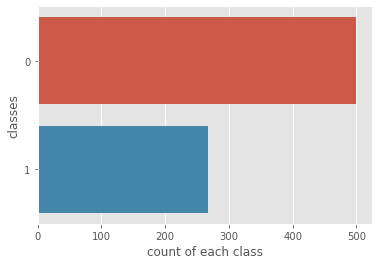

In [32]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [33]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

### Separate Train/Test sets


In [34]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [35]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50, 100, 200],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3,4], 
             'min_samples_split' : [4,5,10],
              'min_samples_leaf' : [4,5,10]
             }

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [4, 5, 10],
                         'min_samples_split': [4, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=10)

In [41]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.586916 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.231746 (0.176697) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.218171 (0.090479) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.234957 (0.124789) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.145856 (0.020511) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.200172 (0.100517) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
0.231504 (0.102695) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.299249 (0.020560) with: {'criteri

In [42]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.67      0.46      0.54        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



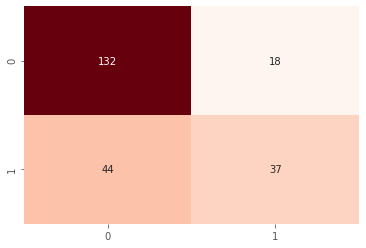

In [44]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [46]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=4, min_samples_split=5, min_samples_leaf=4)
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

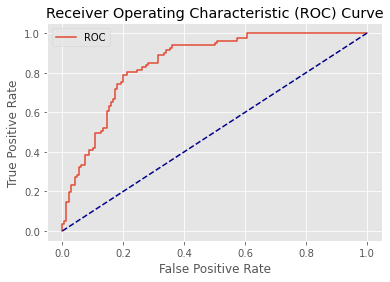

AUC: 0.85


In [47]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

<AxesSubplot:>

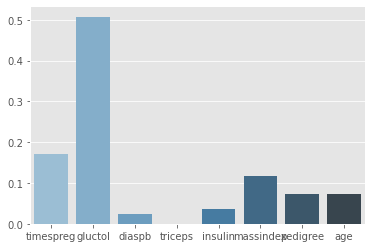

In [29]:
sns.barplot(x=X_train.columns, y=rand_forest.feature_importances_, palette="Blues_d")


## Adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=10))
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = adaboost.predict(X_test)
print("f1_score: ", metrics.f1_score(y_test, y_pred))

f1_score:  0.6405228758169934


In [78]:
## from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [2000, 5000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1, 10],
                         'n_estimators': [2000, 5000]},
             scoring='f1', verbose=10)

In [73]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.607524 using {'learning_rate': 0.01, 'n_estimators': 1000}
0.581970 (0.079911) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.607524 (0.065777) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.604780 (0.063182) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.527640 (0.043858) with: {'learning_rate': 1, 'n_estimators': 1000}
0.277418 (0.078891) with: {'learning_rate': 10, 'n_estimators': 1000}


In [74]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

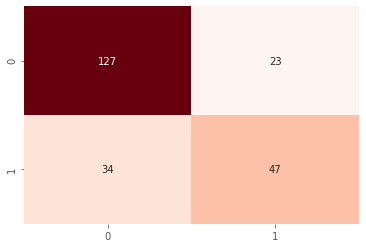

In [75]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [77]:
y_pred_train = best_model.predict(X_train)
print("f1_score_train: ", metrics.f1_score(y_train, y_pred_train))
print("f1_score_test: ", metrics.f1_score(y_test, y_pred))

f1_score_train:  0.6884272997032642
f1_score_test:  0.6225165562913907


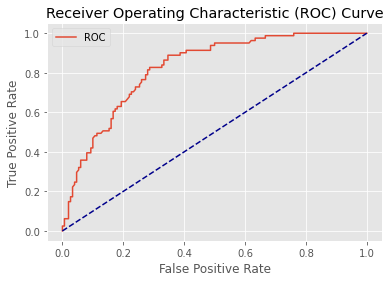

AUC: 0.82


In [31]:
adaboost = AdaBoostClassifier(n_estimators=30, learning_rate=1)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)